In [7]:
import os

# ------------------------------------------------------------
# Output
# ------------------------------------------------------------

BASE_DIR= r"C:/Users/wsfm/OneDrive - Loughborough University/_Personal_Backup/ground_based_solar_irradiance/"
OUT_DIR = os.path.join(BASE_DIR,"v_results_3_output")

Saved: outputs\Figure_3_1_4.png and outputs\Figure_3_1_4.svg


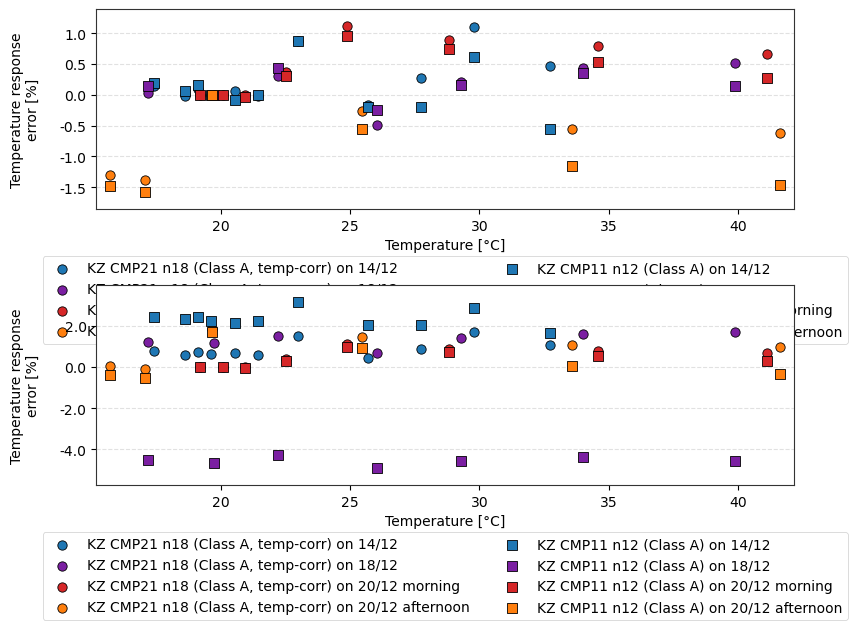

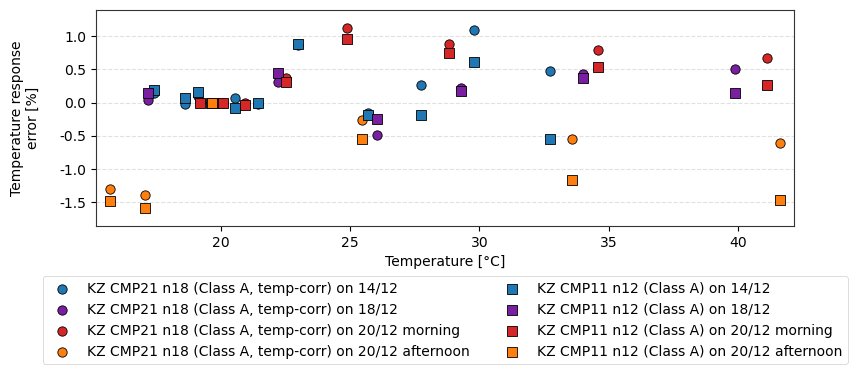

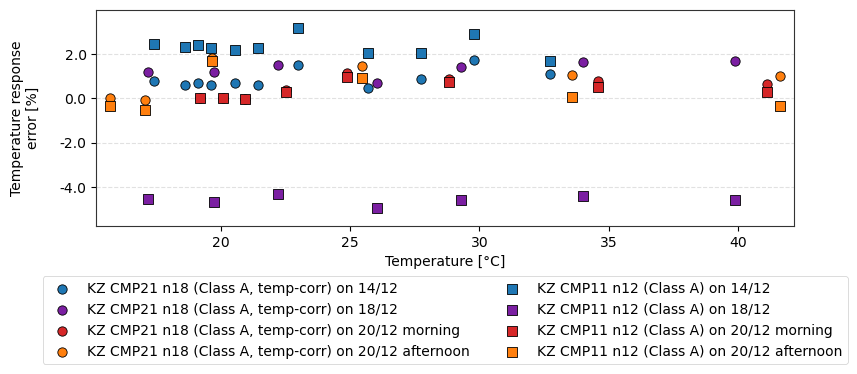

In [20]:
# -*- coding: utf-8 -*-
# Figure 3.1.4 — Temperature characterisation (two panels, scatter only)
#
# Formatting per user's instructions:
#  - Class A temperature corrected pyr. 18  → circle marker
#  - Class A type 1 pyr. 12                → square marker
#  - Chronological order: 14/12, 18/12, 20/12, 20/12 b
#  - Gradual colours for the 12-series: Purple(14/12), Blue(18/12), Orange(20/12), Red(20/12 b)
#
# Saves:
#   outputs/Figure_3_1_4.png, .svg
#   outputs/Figure_3_1_4a.png/.svg (panel A) and outputs/Figure_3_1_4b.png/.svg (panel B)

import os
import numpy as np
import matplotlib.pyplot as plt
import textwrap 
from matplotlib.ticker import FormatStrFormatter

# ------------------------------------------------------------------------------
# Runtime options
# ------------------------------------------------------------------------------
USE_EXCEL = False     # set True to pull from Excel once ranges are fixed

# ------------------------------------------------------------------------------
# DATA from the prompt document (exact numbers, two <chart> blocks)
# Panel A
# ------------------------------------------------------------------------------
# (1) 20/12 verified 15/10/25
x_201220_a = [19.189956029523813, 20.083747273333334, 20.941700163095238, 22.504103797380953,
              24.863859495238096, 28.827666510000004, 34.577870414523815, 41.12955166095238]
y18_201220_a = [4.3121224012176717e-05, 0.0, -9.010334326982752e-05, 3.7093432692950901e-03,
                1.1231004338103706e-02, 8.8622425124764825e-03, 7.863677645717708e-03, 6.6686103483305104e-03]
y12_201220_a = [-9.0285593602353094e-06, 0.0, -3.1224938820952975e-04, 3.023545499285663e-03,
                9.5563496574269432e-03, 7.3887440525865211e-03, 5.2810292377967992e-03, 2.6858833258279584e-03]

# (2) 20/12 b verified 15/10/25
x_201220b_a = [15.712352638715066, 17.072195461904762, 19.662425767380952,
               25.451005117857147, 33.572910762619053, 41.630890710714276]
y18_201220b_a = [-1.2975540834256659e-02, -1.3849520386091607e-02, 0.0,
                 -2.6469290420472287e-03, -5.4848971520147375e-03, -6.1620881705804313e-03]
y12_201220b_a = [-1.4820073184232084e-02, -1.5863379883629694e-02, 0.0,
                 -5.536057858959182e-03, -1.1645267901932715e-02, -1.460752833005111e-02]


# (3) 18/12 verified 15/10/25
x_181218_a = [17.174275579906645, 19.754502886817569, 22.21233931041899,
              26.052398590814498, 29.295223145257857, 33.995300383794877, 39.882968085152761]
y18_181218_a = [3.3382450185339389e-04, 0.0, 3.0885153142631949e-03, -4.8974882461312345e-03,
                2.155593488433835e-03, 4.3153191319731804e-03, 5.106623072382248e-03]
y12_181218_a = [1.3807889402484713e-03, 0.0, 4.4026655495896612e-03, -2.4185313296788366e-03,
                1.6744691940417614e-03, 3.6202522985974645e-03, 1.4053502463321286e-03]

# (4) 14/12 verified 15/10/25
x_141218_a = [17.425868579319545, 18.605109351021902, 19.105916159493582, 19.60846455891927,
              20.562011446271622, 21.455725488208589, 22.977772122337704, 25.687925111679803,
              27.730552809579031, 29.789756275358656, 32.733146440415155]
y18_141218_a = [1.4969960463677079e-03, -2.5946746645954231e-04, 9.3918871114257471e-04, 0.0,
                7.0770382953862503e-04, -2.3295602568471524e-04, 8.6829690236047505e-03, -1.5918361350362789e-03,
                2.6678918971399807e-03, 1.0984643148141789e-02, 4.7683307303041447e-03]
y12_141218_a = [1.8497127450035867e-03, 6.6044535635477225e-04, 1.5305209241082102e-03, 0.0,
                -8.3751089570445968e-04, -5.743249593765693e-05, 8.7387134706525468e-03, -1.9178341814890235e-03,
                -1.9438834402453172e-03, 6.0746538926812832e-03, -5.5019610919970728e-03]

# ------------------------------------------------------------------------------
# DATA — Panel B (second <chart> block in the prompt doc)
# ------------------------------------------------------------------------------
# (1) 20/12
x_201220_b = x_201220_a[:]  # same abscissae
y18_201220_b = y18_201220_a[:]  
y12_201220_b = y12_201220_a[:]


# (4) 20/12 b
x_201220b_b = x_201220b_a[:]  # same shorter abscissae

y18_201220b_b = [3.8361983132965884e-04, -9.2391852066663765e-04, 1.8280334608222842e-02,
                1.4629419888834955e-02, 1.0615572953914125e-02, 9.8941796482231951e-03]
y12_201220b_b = [-3.6495364987666938e-03, -5.1827293542529877e-03, 1.6792946176730394e-02,
                9.1400172579234797e-03, 6.028130346674395e-04, -3.3023245434335366e-03]
# NB: the prompt lists only 6 values here (subset of the abscissae)


# (2) 18/12
x_181218_b = x_181218_a[:]  # same abscissae
y18_181218_b = [1.2043109038581546e-02, 1.1689341240680771e-02, 1.4916739674105823e-02,
                6.8632328215872031e-03, 1.4000373346027844e-02, 1.6220273692830682e-02, 1.6988123427592004e-02]
y12_181218_b = [-4.5341028526673065e-02, -4.6582453036951216e-02, -4.2862996002962235e-02,
                -4.9310944663543674e-02, -4.5547100493970857e-02, -4.3874430163755175e-02, -4.5859679028097004e-02]

# (3) 14/12
x_141218_b = x_141218_a[:]  # same abscissae
y18_141218_b = [7.6321331845379875e-03, 5.8512890123244522e-03, 7.0636451160141786e-03, 6.1082253970018768e-03,
                6.8154978277001526e-03, 5.8728383193765894e-03, 1.4943612647445401e-02, 4.4865554242123169e-03,
                8.7815686185198083e-03, 1.7239849921616091e-02, 1.0872199836196347e-02]
y12_141218_b = [2.4473043001374949e-02, 2.3232555434635045e-02, 2.412835082099735e-02, 2.2534110975186435e-02,
                2.1643279698452277e-02, 2.2475597726785524e-02, 3.1722151266950466e-02, 2.0518261156984983e-02,
                2.0448622909707947e-02, 2.8871436285062519e-02, 1.6671410708486135e-02]


# ------------------------------------------------------------------------------
# Helper: assemble series in chronological order and with desired styling
# ------------------------------------------------------------------------------
def to_series_panel_A():
    # order: 14/12, 18/12, 20/12, 20/12 b
    return [
        ("KZ CMP21 n18 (Class A, temp-corr) on 14/12", np.array(x_141218_a), np.array(y18_141218_a), "18", "14"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 18/12", np.array(x_181218_a), np.array(y18_181218_a), "18", "18"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 20/12 morning", np.array(x_201220_a), np.array(y18_201220_a), "18", "20"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 20/12 afternoon", np.array(x_201220b_a), np.array(y18_201220b_a), "18", "20b"),
        ("KZ CMP11 n12 (Class A) on 14/12", np.array(x_141218_a), np.array(y12_141218_a), "12", "14"),
        ("KZ CMP11 n12 (Class A) on 18/12", np.array(x_181218_a), np.array(y12_181218_a), "12", "18"),
        ("KZ CMP11 n12 (Class A) on 20/12 morning", np.array(x_201220_a), np.array(y12_201220_a), "12", "20"),
        ("KZ CMP11 n12 (Class A) on 20/12 afternoon", np.array(x_201220b_a), np.array(y12_201220b_a), "12", "20b"),
    ]

def to_series_panel_B():
    return [
        ("KZ CMP21 n18 (Class A, temp-corr) on 14/12", np.array(x_141218_b), np.array(y18_141218_b), "18", "14"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 18/12", np.array(x_181218_b), np.array(y18_181218_b), "18", "18"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 20/12 morning", np.array(x_201220_b), np.array(y18_201220_b), "18", "20"),
        ("KZ CMP21 n18 (Class A, temp-corr) on 20/12 afternoon", np.array(x_201220b_b), np.array(y18_201220b_b), "18", "20b"),
        ("KZ CMP11 n12 (Class A) on 14/12", np.array(x_141218_b), np.array(y12_141218_b), "12", "14"),
        ("KZ CMP11 n12 (Class A) on 18/12", np.array(x_181218_b), np.array(y12_181218_b), "12", "18"),
        ("KZ CMP11 n12 (Class A) on 20/12 morning", np.array(x_201220_b), np.array(y12_201220_b), "12", "20"),
        ("KZ CMP11 n12 (Class A) on 20/12 afternoon", np.array(x_201220b_b), np.array(y12_201220b_b), "12", "20b"),
    ]

# Marker & colour maps (per instructions)
MARKERS = {
    "18": "o",   # circle
    "12": "s",   # square
}
# Colours for the 12-series (chronological gradient as requested)
COLORS_12 = {
    "14":  "#1f77b4",   # purple (14/12)
    "18": "#7b1fa2",   # blue   (18/12)
    "20":  "#d62728",    # orange (20/12)
    "20b": "#ff7f0e",   # red    (20/12 b)
}
# Neutral, clearly distinct gradient for the 18-series (not specified → use greys)
COLORS_18 = {
    "14": "#6d6d6d",
    "18": "#7f7f7f",
    "20": "#9a9a9a",
    "20b": "#bdbdbd",
}

COLORS_18 = {
    "14":  "#1f77b4",   # purple (14/12)
    "18": "#7b1fa2",   # blue   (18/12)
    "20":  "#d62728",    # orange (20/12)
    "20b": "#ff7f0e",   # red    (20/12 b)
}

def get_style(kind, date_code):
    if kind == "12":
        return {"color": COLORS_12[date_code], "marker": MARKERS[kind]}
    else:
        return {"color": COLORS_18[date_code], "marker": MARKERS[kind]}

# ------------------------------------------------------------------------------
# Matplotlib style
# ------------------------------------------------------------------------------
plt.rcParams.update({
    "axes.edgecolor": "#333",
    "axes.linewidth": 0.8,
    "grid.color": "#bdbdbd",
    "grid.linestyle": "--",
    "grid.alpha": 0.45,
    "axes.grid": True,
    "font.size": 10,
})

FIGSIZE = (9.0, 6.8)


# --------------------------- NEW: y-label wrapper ---------------------------
def wrap_text(text: str, width: int = 22) -> str:
    """Return `text` wrapped to `width` characters with explicit newlines."""
    if not text:
        return text
    return "\n".join(textwrap.wrap(text, width=width, break_long_words=False, break_on_hyphens=False))


def make_panel(ax, series, title_suffix: str = "", ylabel: str = "", ylabel_wrap: int = 22):
    # --- Build plot arrays and convert FRACTIONS -> PERCENT for y ---
    xs_all_list = []
    ys_all_list = []   # will hold PERCENT values for limits

    for label, x, y, kind, date_code in series:
        x = np.asarray(x)
        y = np.asarray(y) * 100.0  # <<< CHANGED: convert to percent

        xs_all_list.append(x)
        ys_all_list.append(y)

        st = get_style(kind, date_code)
        ax.scatter(x, y, s=45, marker=st["marker"], c=st["color"],
                   edgecolors="black", linewidths=0.6, zorder=3, label=label)

    # --- Axes & labels (no figure title per thesis style) ---
    ax.set_xlabel("Temperature [°C]")
    if ylabel:
        ax.set_ylabel(wrap_text(ylabel, width=ylabel_wrap), labelpad=14)

    # --- Compute limits FROM PERCENT values (and a bit of padding) ---
    xs_all = np.concatenate(xs_all_list) if xs_all_list else np.array([0.0])
    ys_all = np.concatenate(ys_all_list) if ys_all_list else np.array([0.0])

    xmin, xmax = float(np.nanmin(xs_all)), float(np.nanmax(xs_all))
    ymin, ymax = float(np.nanmin(ys_all)), float(np.nanmax(ys_all))

    xpad = 0.02 * (xmax - xmin if xmax > xmin else 1.0)
    ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)

    ax.set_xlim(xmin - xpad, xmax + xpad)
    ax.set_ylim(ymin - ypad, ymax + ypad)

    # --- Grid & tick formatting ---
    ax.grid(True, axis="y")
    ax.grid(False, axis="x")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))  # <<< NEW: one decimal on y-axis

    # --- Legend below panel, compact ---
    leg = ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.20), ncol=2, frameon=True)
    leg.get_frame().set_linewidth(0.6)

# ------------------------------------------------------------------------------
# Build figure (two stacked panels)
# ------------------------------------------------------------------------------
fig, (axA, axB) = plt.subplots(2, 1, figsize=FIGSIZE, sharex=False)

make_panel(axA, to_series_panel_A(), title_suffix="(a)", ylabel = "Temperature response error [%]") # against session reference [%]")
make_panel(axB, to_series_panel_B(), title_suffix="(b)", ylabel = "Temperature response error [%]") #against 18/12 reference [%]")

fig.subplots_adjust(hspace=0.38, bottom=0.18)

# Save combined and per-panel versions
out_png = os.path.join(OUT_DIR, "Figure_3_1_4.png")
out_svg = os.path.join(OUT_DIR, "Figure_3_1_4.svg")
fig.savefig(out_png, dpi=300)
fig.savefig(out_svg)

# Optionally export each panel separately
figA, axA2 = plt.subplots(1, 1, figsize=(9.0, 3.6))
make_panel(axA2, to_series_panel_A(), title_suffix="(a)", ylabel = "Temperature response error [%]") # against session reference [%]")
figA.subplots_adjust(bottom=0.28)
figA.savefig(os.path.join(OUT_DIR, "Figure_3_1_4a.png"), dpi=300)
figA.savefig(os.path.join(OUT_DIR, "Figure_3_1_4a.svg"))

figB, axB2 = plt.subplots(1, 1, figsize=(9.0, 3.6))
make_panel(axB2, to_series_panel_B(), title_suffix="(b)", ylabel = "Temperature response error [%]") #against 18/12 reference [%]")
figB.subplots_adjust(bottom=0.28)
figB.savefig(os.path.join(OUT_DIR, "Figure_3_1_4b.png"), dpi=300)
figB.savefig(os.path.join(OUT_DIR, "Figure_3_1_4b.svg"))

print("Saved:", out_png, "and", out_svg)